In [2]:
import os
import json
import glob
import pandas as pd
import numpy as np
from google.colab import files

In [3]:
RUN_ENV = 'COLAB' # 'PC' or 'COLAB'

# 0 Load Data by uploading json files maded by ning (need to repeat every time b4 u start)

In [4]:
if RUN_ENV == 'COLAB':
    #jsonÊñá‰ª∂ÔºåÂú∞ÂùÄÂú®githubÂ∫ìMF_KOC\Data\raw\, ÂØºÂÖ•‰∏ä‰º†Êñá‰ª∂‰∏∫data frameÊ†ºÂºè
    uploaded_creator = files.upload()
    df_creator_0 = pd.read_json(next(iter(uploaded_creator)))
    df_creator = df_creator_0.copy()
    uploaded_content = files.upload()
    df_contents_0 = pd.read_json(next(iter(uploaded_content)))
    df_contents = df_contents_0.copy()
elif RUN_ENV == 'PC':
    #ËØªÂèñÊú¨Âú∞jsonÊñá‰ª∂
    df_creator = pd.read_json(r'..\Data\raw\creator_cooked.json')
    df_contents = pd.read_json(r'..\Data\raw\contents_cooked.json')

Saving creator_cooked.json to creator_cooked.json


Saving contents_cooked.json to contents_cooked.json


In [5]:
df_creator.shape

(102, 45)

In [6]:
df_contents.shape

(15941, 16)

In [7]:
df_creator.head(1).T

0
user_id                                                576d3bde82ec3952ff40c5e1
nickname                                                                 ËææÊãâÊñØÂ∞èÈ∏°ËÖø
avatar                        https://sns-avatar-qc.xhscdn.com/avatar/61df4c...
desc                          ÊÖ¢ÊÖ¢‰∫ÜËß£‰∏ñÁïåÔºåÊÖ¢ÊÖ¢Êõ¥Êñ∞Ëá™Â∑±\nÂêÉÂñùÁé©‰πê+ÂÆùÂÆù‰ª¨ÔºåÈöèÂøÉÂàÜ‰∫´\n‰ΩõÁ≥ªÊõ¥Êñ∞‰∏≠ÔΩûÊØîÂøÉü´∞ | Zodi...
ip_location                                                                  ÁæéÂõΩ
follows                                                                     837
fans                                                                       1653
interaction                                                               11636
last_modify_ts                                                    1741740734045
pic_per_normal_note                                                    7.583333
video_ratio                                                            0.013699
hot_note_count                                                               19
total_share_counts_hot_ratio                                           0.558764
last_note2now                                                                 0
last_hot_note2now                                                            22
weighted_total_share_counts                                         4432.999131
score_2                                                               79.581669
liked_count                                                                6443
collected_count                                                            4951
comment_count                                                              2847
share_count                                                                4433
note_count                                                                  146
location                                                                     US
ff_ratio                                                                1.97491
age_koc                                                                    2054
is_female                                                                     1
min                                                               1564268443000
max                                                               1741739525000
post_span                                                          177471082000
first_post_time                                             2019-07-27 23:00:43
account_length                                                     177472291045
history_avg                                                      1223938.496552
history_std                                                      4806686.422332
post_avg                                                          1668700438000
post_std                                                        32975724.822905
liked_90                                                                    330
collected_90                                                                203
comment_90                                                                   92
share_90                                                                    289
note_count_90                                                                 8
liked_180                                                                  6266
collected_180                                                              4790
comment_180                                                                2717
share_180                                                                  4361
note_count_180                                                              141

In [ ]:
df_contents.head(1).T

0
note_id                                      67d0d605000000002903d86a
user_id                                      576d3bde82ec3952ff40c5e1
title                                           ÊúâÊ≤°ÊúâÂíåÊàë‰∏ÄÊ†∑„ÄêÂêÉËå∂‰∏âÂçÉ„Äë‰∏ÄÂñù‰∏Ä‰∏™‰∏çÂê±Â£∞ÁöÑ
note_body           ËøûÂú∞ÂùÄÈÉΩ‰∏çÊÉ≥ÂÜô‰∫Ü[Á¨ëÂì≠R]\nËôΩÁÑ∂ÁéØÂ¢ÉËøò‰∏çÈîôÔºåÈ¢úÂÄº‰πü‰∏çÈîô\n‰ΩÜÊàëÊÑüËßâËá™Â∑±ÂÆåÂÖ®ÊãîËçâ‰∫Ü\nÂ∞ù‰∫Üm...
tag_list                    ËææÊãâÊñØÁΩëÁ∫¢Â•∂Ëå∂,ËææÊãâÊñØÂ•∂Ëå∂,ËææÊãâÊñØ,ËææÊãâÊñØÁîüÊ¥ª,ËææÊãâÊñØÁæéÈ£ü,ËææÊãâÊñØÂë®Ëæπ,ËææÊãâÊñØÊé¢Â∫ó
image_count                                                         1
content_type_video                                                  0
hot_note                                                            0
post_time                                         2025-03-12 00:32:05
last_update_time                                  2025-03-12 00:32:06
scraped_time                               2025-03-12 00:55:08.175000
liked_count                                                         5
collected_count                                                     2
comment_count                                                      10
share_count                                                         3
interaction_count                                                  17

# 2 Treat the df_contents table

In [ ]:
import numpy as np
import pandas as pd
import math

# =====================
# ‰∫íÂä®ÊïàËÉΩ Interaction Efficiency (50%)
# =====================

def calculate_interaction_efficiency(df_contents, user_id):
    """
    ËÆ°ÁÆó‰∫íÂä®ÊïàËÉΩÂæóÂàÜ (50%)
    Ê†πÊçÆÊó∂Èó¥Ë°∞ÂáèÁöÑÁÇπËµû„ÄÅÊî∂Ëóè„ÄÅËØÑËÆ∫ÈáèËøõË°åÂä†ÊùÉÔºåÂü∫‰∫éÊõ¥È´òÂàÜ‰ΩçÂÄºÔºà‰æãÂ¶Ç90%ÂàÜ‰ΩçÔºâÊù•ÈÅøÂÖçËΩªÊòìÊª°ÂàÜ„ÄÇ
    Ë°∞ÂáèÁ≥ªÊï∞ÈÄöËøáËÆ°ÁÆóÂèëÂ∏ñÊó∂Èó¥‰∏éÂΩìÂâçÊó∂Èó¥ÁöÑÂ∑ÆÂºÇÔºåÂáèÂ∞ëËÄÅÂ∏ñÁöÑÂΩ±Âìç„ÄÇ

    Ë°∞ÂáèÂÖ¨ÂºèÔºö
    d_i = exp(-0.0077 * t)  (t = ÂèëÂ∏ñÂà∞ÊäìÂèñÁöÑÂ§©Êï∞)

    ÈááÁî®ËΩØÁº©ÊîæÔºàsoft scaleÔºâÂáΩÊï∞ÈÅøÂÖçÂÆπÊòìËé∑ÂæóÊª°ÂàÜ„ÄÇ
    ÊâìÂàÜÂÖ¨ÂºèËÆ°ÁÆóÁöÑÊòØÊØè‰∏™‰∫íÂä®Á±ªÂûãÁöÑÂä†ÊùÉÂæóÂàÜÔºåÂπ∂ÁªìÂêàÊùÉÈáçËøõË°åÊÄªÂæóÂàÜÁöÑËÆ°ÁÆó„ÄÇ

    ÂèÇÊï∞Ôºö
    df_contents: ÂåÖÂê´ÂÜÖÂÆπÊï∞ÊçÆÔºà‰æãÂ¶ÇÁÇπËµûÊï∞„ÄÅËØÑËÆ∫Êï∞Á≠âÔºâÁöÑ DataFrame
    user_id: ÈúÄË¶ÅËÆ°ÁÆó‰∫íÂä®ÊïàËÉΩÂæóÂàÜÁöÑÁî®Êà∑ID

    ËøîÂõûÔºö
    ‰∫íÂä®ÊïàËÉΩÂæóÂàÜÔºåËåÉÂõ¥ 0 Âà∞ 50
    """

    current_content = df_contents[df_contents['user_id'] == user_id].copy()

    if current_content.empty:
        return 0.0

    # ËÆ°ÁÆóÂä®ÊÄÅÂü∫ÂáÜÂÄºÔºöÁÇπËµû„ÄÅÊî∂Ëóè„ÄÅËØÑËÆ∫ÁöÑ90%ÂàÜ‰ΩçÂÄºÔºàÊèêÈ´òÊ†áÂáÜÔºâ
    B_L = np.percentile(df_contents['liked_count'], 90)    # ÁÇπËµûÂü∫ÂáÜ
    B_CL = np.percentile(df_contents['collected_count'], 90)  # Êî∂ËóèÂü∫ÂáÜ
    B_C = np.percentile(df_contents['comment_count'], 90)   # ËØÑËÆ∫Âü∫ÂáÜ

    # ËÆ°ÁÆóÊó∂Èó¥Ë°∞Âáè
    current_content['days_since_post'] = (current_content['scraped_time'] - current_content['post_time']).dt.days.clip(lower=0)
    current_content['decay'] = np.exp(-0.0077 * current_content['days_since_post'])

    # ËÆ°ÁÆóÂä†ÊùÉÂêéÁöÑ‰∫íÂä®Èáè
    like_weighted = (current_content['liked_count'] * current_content['decay']).sum()
    collect_weighted = (current_content['collected_count'] * current_content['decay']).sum()
    comment_weighted = (current_content['comment_count'] * current_content['decay']).sum()

    # ‰ΩøÁî®ËΩØÁº©ÊîæÂáΩÊï∞Êù•ÈÅøÂÖçÂæóÂàÜËøáÈ´ò
    soft_scale = lambda x, base: x / (base + x)

    # ËÆ°ÁÆóÊØè‰∏™‰∫íÂä®Á±ªÂûãÁöÑÂæóÂàÜ
    like_score = soft_scale(like_weighted, B_L) * 0.35
    collect_score = soft_scale(collect_weighted, B_CL) * 0.45
    comment_score = soft_scale(comment_weighted, B_C) * 0.2

    # ËÆ°ÁÆóÊúÄÁªàÁöÑ‰∫íÂä®ÊïàËÉΩÂæóÂàÜÔºåÊåâ50%ÊùÉÈáçËÆ°ÁÆó
    total_score = (like_score + collect_score + comment_score) * 50
    return min(total_score, 50)  # ‰øùËØÅÊúÄÁªàÂæóÂàÜ‰∏çË∂ÖËøá50


# =====================
# ‰∫íÂä®Ë¥®Èáè Interaction Quality (30%)
# =====================

def calculate_interaction_quality(df_creator, df_contents, user_id):
    """
    ËÆ°ÁÆó‰∫íÂä®Ë¥®ÈáèÂæóÂàÜ (30%)
    ‰ΩøÁî®ËΩØÂåñÂáΩÊï∞Êù•Âπ≥ÊªëÊ∏óÈÄèÁéáÂíåËØÑËÆ∫Âç†ÊØîÔºåÈÅøÂÖçËøáÈ´òÂæóÂàÜÔºåÂ∞§ÂÖ∂ÊòØÁ≤â‰∏ùÊï∞ËæÉÂ∞ëÊó∂„ÄÇ

    Ê†πÊçÆ‰∫íÂä®Ê∏óÈÄèÁéáÂíåËØÑËÆ∫Âç†ÊØîÊù•ËØÑ‰º∞Ë¥®ÈáèÔºö
    - ÂØπ‰∫éÁ≤â‰∏ùÊï∞ ‚â• 1000 ÁöÑÁî®Êà∑Ôºå‰∏ªË¶ÅÂü∫‰∫é‰∫íÂä®Ê∏óÈÄèÁéáÂíåÊ¥ªË∑ÉÁ≤â‰∏ùÂç†ÊØîÊù•ÊâìÂàÜ„ÄÇ
    - ÂØπ‰∫éÁ≤â‰∏ùÊï∞ < 1000 ÁöÑÁî®Êà∑ÔºåÂü∫‰∫é‰∫íÂä®Ê∏óÈÄèÁéáÂíåËØÑËÆ∫Âç†ÊØîÊù•ÊâìÂàÜ„ÄÇ

    ËΩØÁº©ÊîæÂáΩÊï∞ÈÅøÂÖç‰∫ÜÂæóÂàÜÁöÑËøÖÁåõÂ¢ûÈïø„ÄÇ

    ÂèÇÊï∞Ôºö
    df_creator: ÂåÖÂê´Áî®Êà∑‰ø°ÊÅØÁöÑ DataFrameÔºà‰æãÂ¶ÇÁ≤â‰∏ùÊï∞Á≠âÔºâ
    df_contents: ÂåÖÂê´Áî®Êà∑ÂÜÖÂÆπ‰∫íÂä®Êï∞ÊçÆÁöÑ DataFrame
    user_id: ÈúÄË¶ÅËÆ°ÁÆó‰∫íÂä®Ë¥®ÈáèÂæóÂàÜÁöÑÁî®Êà∑ID

    ËøîÂõûÔºö
    ‰∫íÂä®Ë¥®ÈáèÂæóÂàÜÔºåËåÉÂõ¥ 0 Âà∞ 30
    """

    user = df_creator[df_creator['user_id'] == user_id]
    if user.empty:
        return 0.0
    user = user.iloc[0]

    fans = user['fans']
    notes = df_contents[df_contents['user_id'] == user_id]
    total_likes = notes['liked_count'].sum()
    total_collects = notes['collected_count'].sum()
    total_comments = notes['comment_count'].sum()
    total_interactions = total_likes + total_collects + total_comments

    if fans == 0 or total_interactions == 0:
        return 0.0

    # ÂÆö‰πâÂü∫ÂáÜÂÄº
    B_Int = 25  # ‰∫íÂä®Ê∏óÈÄèÁéáÂü∫ÂáÜ
    B_AF = 50   # Ê¥ªË∑ÉÁ≤â‰∏ùÂç†ÊØîÂü∫ÂáÜ
    B_CR = 10   # ËØÑËÆ∫Âç†ÊØîÂü∫ÂáÜ

    # ËÆ°ÁÆó‰∫íÂä®Ê∏óÈÄèÁéáÂíåËØÑËÆ∫Âç†ÊØî
    penetration = total_interactions / fans * 100
    comment_ratio = total_comments / total_interactions * 100
    active_fan_ratio = 50  # ÈªòËÆ§ÂÄº

    # ‰ΩøÁî®ËΩØÁº©ÊîæÂáΩÊï∞Êù•ÈÅøÂÖçÂæóÂàÜËøáÈ´ò
    soft_score = lambda x, base: x / (x + base)

    # ÂØπÁ≤â‰∏ùÊï∞ ‚â• 1000 ÁöÑÁî®Êà∑ÔºåÊ†πÊçÆÊ∏óÈÄèÁéáÂíåÊ¥ªË∑ÉÁ≤â‰∏ùÂç†ÊØîÊâìÂàÜ
    if fans >= 1000:
        score = (soft_score(penetration, B_Int) * 0.7 + soft_score(active_fan_ratio, B_AF) * 0.3) * 30
    else:
        score = (soft_score(penetration, B_Int) * 0.7 + soft_score(comment_ratio, B_CR) * 0.3) * 30

    return min(score, 30)  # ‰øùËØÅÊúÄÁªàÂæóÂàÜ‰∏çË∂ÖËøá30


# =====================
# Ë¥¶Âè∑Ê¥ªË∑ÉÂ∫¶ Account Activity (20%)
# =====================

def calculate_account_activity(df_contents, user_id, now=None):
    """
    ËÆ°ÁÆóË¥¶Âè∑Ê¥ªË∑ÉÂ∫¶ÂæóÂàÜÔºàÂç†ÊÄªÂàÜ 20%Ôºâ
    Ê†πÊçÆÂèëÂ∏ñÈó¥Èöî„ÄÅÂèëÂ∏ñÊ≥¢Âä®ÊÄßÔºàÊ†áÂáÜÂ∑ÆÔºâ„ÄÅËøë90Â§©ÂèëÂ∏ñÊï∞ÈáèÊù•ËØÑ‰º∞Ê¥ªË∑ÉÂ∫¶„ÄÇ
    ÈÄöËøáËΩØÂåñÂÖ¨ÂºèÔºåÈÅøÂÖçÊûÅÁ´ØÂæóÂàÜÔºåÁªô‰∏≠Á≠âÊ¥ªË∑ÉÂ∫¶ÁöÑÁî®Êà∑ÈÄÇÂΩìÂä†ÂàÜ„ÄÇ

    ËØÑÂàÜÁª¥Â∫¶Ôºö
    - ÂèëÂ∏ñÈó¥ÈöîÂùáÂÄºÔºöÈ¢ëÁπÅÂèëÂ∏ñÁî®Êà∑ÂæóÂàÜÊõ¥È´ò
    - ÂèëÂ∏ñÊ≥¢Âä®ÊÄßÔºàÊ†áÂáÜÂ∑ÆÔºâÔºöÂèëÂ∏ñË∂äËßÑÂæãÂæóÂàÜË∂äÈ´ò
    - Ëøë90Â§©ÂèëÂ∏ñÊï∞ÈáèÔºöË∂äÊ¥ªË∑ÉÂæóÂàÜË∂äÈ´ò

    ÂèÇÊï∞Ôºö
    df_contents: ÂåÖÂê´ÂÜÖÂÆπÊï∞ÊçÆÔºà‰æãÂ¶ÇÂèëÂ∏ñÊó∂Èó¥ÔºâÁöÑ DataFrame
    user_id: ÈúÄË¶ÅËÆ°ÁÆóÊ¥ªË∑ÉÂ∫¶ÂæóÂàÜÁöÑÁî®Êà∑ID
    now: ÂΩìÂâçÊó∂Èó¥ÔºåÈªòËÆ§‰∏∫ÂΩìÂâçÊó∂Èó¥ÔºàÁî®‰∫éËÆ°ÁÆóËøë90Â§©ÂèëÂ∏ñÔºâ

    ËøîÂõûÔºö
    Ë¥¶Âè∑Ê¥ªË∑ÉÂ∫¶ÂæóÂàÜÔºåËåÉÂõ¥ 0 Âà∞ 20
    """

    if now is None:
        now = pd.Timestamp.now()

    # Ëé∑ÂèñËØ•Áî®Êà∑ÁöÑÊâÄÊúâÂèëÂ∏ñËÆ∞ÂΩïÔºåÂπ∂ÊåâÊó∂Èó¥ÊéíÂ∫è
    notes = df_contents[df_contents['user_id'] == user_id].sort_values('post_time')

    # Ëã•Â∏ñÂ≠êÂ∞ë‰∫é2Êù°ÔºåÊó†Ê≥ïËÆ°ÁÆóÈó¥ÈöîÂíåÊ†áÂáÜÂ∑ÆÔºåÁõ¥Êé•ËøîÂõû0ÂàÜ
    if notes.empty or len(notes) < 2:
        return 0.0

    # ËÆ°ÁÆóÂèëÂ∏ñÈó¥ÈöîÂíåÊ†áÂáÜÂ∑ÆÔºàÂçï‰ΩçÔºöÂ§©Ôºâ
    post_times = notes['post_time']
    intervals = post_times.diff().dropna().dt.days
    avg_gap = intervals.mean()
    std_gap = intervals.std()

    # Ëøë90Â§©ÂèëÂ∏ñÊï∞Èáè
    recent_count = notes[notes['post_time'] >= now - pd.Timedelta(days=90)].shape[0]

    # ----------- ÂêÑÈ°πËØÑÂàÜÈÄªËæë -----------

    # ÂèëÂ∏ñÈó¥ÈöîËØÑÂàÜÔºö
    # Âπ≥ÂùáÈó¥Èöî ‚â§7Â§© ÂæóÊª°ÂàÜ6ÂàÜÔºåË∂ÖËøáÁöÑÊØè1Â§©Êâ£1ÂàÜ
    score_gap = max(0, min(6, 6 - (avg_gap - 7))) if avg_gap else 6

    # ÂèëÂ∏ñËßÑÂæãÊÄßËØÑÂàÜÔºàÊ†áÂáÜÂ∑ÆÔºâÔºö
    # Ê†áÂáÜÂ∑Æ‚â§2Â§©ÂæóÊª°ÂàÜ2ÂàÜÔºåË∂ÖËøáÁöÑÈÉ®ÂàÜÊØèÂ¢ûÂä†1Â§©Êâ£0.3ÂàÜ
    score_std = max(0, 2 - 0.25 * max(0, std_gap - 2))

    # Ëøë90Â§©Ê¥ªË∑ÉÂ∫¶ËØÑÂàÜÔºö
    # ÂèëÂ∏ñÊï∞‚â•16ÂæóÊª°ÂàÜ8ÂàÜÔºåÊØè2ÁØáÂ∏ñÂ≠êÂæó1ÂàÜ
    score_recent = max(0, min(8, recent_count / 2))

    # Ê±áÊÄªÊÄªÂàÜÔºåÂä†ÊùÉÁ≥ªÊï∞ÊèêÂçáÊÄªÂàÜË°®Áé∞ÔºåÂÜçÂ∞ÅÈ°∂20ÂàÜ
    total_score = (score_gap + score_std + score_recent) * 1.2
    return round(min(total_score, 20), 2)  # ‰øùËØÅÊúÄÁªàÂæóÂàÜ‰∏çË∂ÖËøá20


# =====================
# Ê±áÊÄªÊâÄÊúâÂæóÂàÜÂπ∂Âä†ÂÖ• df_creator
# =====================

def add_final_score_to_df_creator(df_creator, df_contents):
    """
    ‰∏∫df_creatorÊ∑ªÂä†‰∫íÂä®Áª¥Â∫¶ÊâìÂàÜÔºö
    - score1_efficiency: ‰∫íÂä®ÊïàËÉΩÂæóÂàÜÔºàÊúÄÂ§ö50Ôºâ
    - score1_quality: ‰∫íÂä®Ë¥®ÈáèÂæóÂàÜÔºàÊúÄÂ§ö30Ôºâ
    - score1_activity: Ê¥ªË∑ÉÂ∫¶ÂæóÂàÜÔºàÊúÄÂ§ö20Ôºâ
    - score1_final: ÁªºÂêàÂæóÂàÜÔºàÊúÄÂ§ö100Ôºâ

    ÂèÇÊï∞Ôºö
    df_creator: ÂåÖÂê´Áî®Êà∑‰ø°ÊÅØÁöÑ DataFrameÔºà‰æãÂ¶ÇÁ≤â‰∏ùÊï∞„ÄÅÁî®Êà∑Âü∫Êú¨‰ø°ÊÅØÁ≠âÔºâ
    df_contents: ÂåÖÂê´Áî®Êà∑ÂÜÖÂÆπ‰∫íÂä®Êï∞ÊçÆÁöÑ DataFrameÔºà‰æãÂ¶ÇÁÇπËµûÊï∞„ÄÅËØÑËÆ∫Êï∞Á≠âÔºâ

    ËøîÂõûÔºö
    df_creator: Ê∑ªÂä†‰∫Ü‰∫íÂä®ÂæóÂàÜÁöÑÁî®Êà∑ DataFrame
    """

    score1_eff, score1_qual, score1_act, score1_final = [], [], [], []

    for _, row in df_creator.iterrows():
        uid = row['user_id']
        s_eff = calculate_interaction_efficiency(df_contents, uid)
        s_qual = calculate_interaction_quality(df_creator, df_contents, uid)
        s_act = calculate_account_activity(df_contents, uid)
        s_total = s_eff + s_qual + s_act

        score1_eff.append(s_eff)
        score1_qual.append(s_qual)
        score1_act.append(s_act)
        score1_final.append(s_total)

    df_creator['score1_efficiency'] = score1_eff
    df_creator['score1_quality'] = score1_qual
    df_creator['score1_activity'] = score1_act
    df_creator['score1_final'] = score1_final

    return df_creator


In [ ]:
df_creator = add_final_score_to_df_creator(df_creator, df_contents)

In [ ]:
df_creator.head(10).T

0  \
user_id                                                576d3bde82ec3952ff40c5e1   
nickname                                                                 ËææÊãâÊñØÂ∞èÈ∏°ËÖø   
avatar                        https://sns-avatar-qc.xhscdn.com/avatar/61df4c...   
desc                          ÊÖ¢ÊÖ¢‰∫ÜËß£‰∏ñÁïåÔºåÊÖ¢ÊÖ¢Êõ¥Êñ∞Ëá™Â∑±\nÂêÉÂñùÁé©‰πê+ÂÆùÂÆù‰ª¨ÔºåÈöèÂøÉÂàÜ‰∫´\n‰ΩõÁ≥ªÊõ¥Êñ∞‰∏≠ÔΩûÊØîÂøÉü´∞ | Zodi...   
ip_location                                                                  ÁæéÂõΩ   
follows                                                                     837   
fans                                                                       1653   
interaction                                                               11636   
last_modify_ts                                                    1741740734045   
pic_per_normal_note                                                    7.583333   
video_ratio                                                            0.013699   
hot_note_count                                                               19   
total_share_counts_hot_ratio                                           0.558764   
last_note2now                                                                 0   
last_hot_note2now                                                            22   
weighted_total_share_counts                                         4432.999131   
score_2                                                               79.581669   
liked_count                                                                6443   
collected_count                                                            4951   
comment_count                                                              2847   
share_count                                                                4433   
note_count                                                                  146   
location                                                                     US   
ff_ratio                                                                1.97491   
age_koc                                                                    2054   
is_female                                                                     1   
min                                                               1564268443000   
max                                                               1741739525000   
post_span                                                          177471082000   
first_post_time                                             2019-07-27 23:00:43   
account_length                                                     177472291045   
history_avg                                                      1223938.496552   
history_std                                                      4806686.422332   
post_avg                                                          1668700438000   
post_std                                                        32975724.822905   
liked_90                                                                    330   
collected_90                                                                203   
comment_90                                                                   92   
share_90                                                                    289   
note_count_90                                                                 8   
liked_180                                                                  6266   
collected_180                                                              4790   
comment_180                                                                2717   
share_180                                                                  4361   
note_count_180                                                              141   
score1_efficiency                                                     43.292937   
score1_quality                                                          24.9078   
score1_ac

Descriptive Statistics for 'score1_final':

count    102.000000
mean      70.424474
std       15.928084
min       27.429997
25%       61.891410
50%       72.991563
75%       83.322302
90%       89.790223
95%       90.425311
max       93.690989
Name: score1_final, dtype: float64


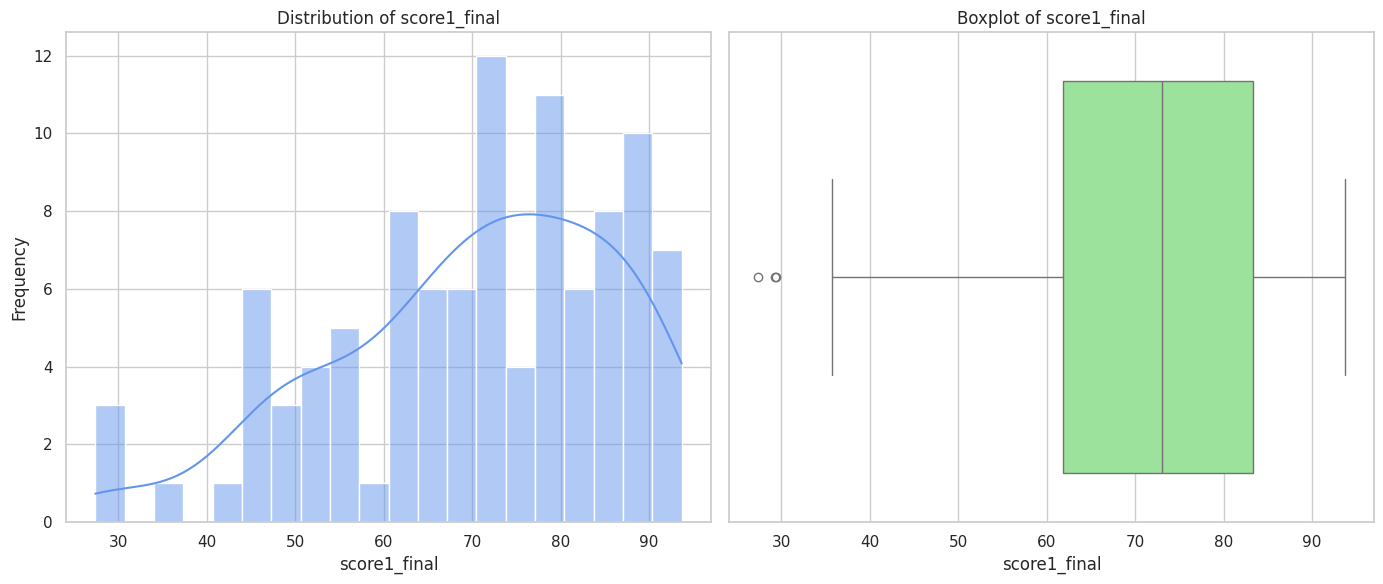

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set visual style
sns.set(style='whitegrid')

# ==========================
# 1. Descriptive Statistics
# ==========================
stats = df_creator['score1_final'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95])
print("Descriptive Statistics for 'score1_final':\n")
print(stats)

# ==========================
# 2. Distribution Plots
# ==========================
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_creator['score1_final'], bins=20, kde=True, color='cornflowerblue')
plt.title('Distribution of score1_final')
plt.xlabel('score1_final')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_creator['score1_final'], color='lightgreen')
plt.title('Boxplot of score1_final')
plt.xlabel('score1_final')

# Display both plots
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
save_path = '/content/drive/MyDrive/DS_HighLevel_Project/KOC_Model/creator_cooked_xh.json'
df_creator.to_json(save_path, orient='records', force_ascii=False,date_format='iso')
import os
if os.path.exists(save_path):
    print(f"Êñá‰ª∂Â∑≤ÊàêÂäü‰øùÂ≠òËá≥Ôºö{save_path}")
else:
    print("Êñá‰ª∂‰øùÂ≠òÂ§±Ë¥•ÔºåËØ∑Ê£ÄÊü•Ë∑ØÂæÑÊàñÊåÇËΩΩÁä∂ÊÄÅ")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Êñá‰ª∂Â∑≤ÊàêÂäü‰øùÂ≠òËá≥Ôºö/content/drive/MyDrive/DS_HighLevel_Project/KOC_Model/creator_cooked_xh.json
